# 1. 데이터 보기.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [3]:
excel="C://Users/ajouu/Documents/python-project-Basic/data/Online Retail.xlsx" # C:// 라고 적어주기. 그리고 절대 경로를 변수에 넣어서 이용하기.
excel

'C://Users/ajouu/Documents/python-project-Basic/data/Online Retail.xlsx'

[Error Solve] 사실 .xlsx 파일이 안 불러와져서 구글링도 해보고, 네이버 카페에도 질문 글을 올렸었다.

* [문제점 1] import xlrd를 해주지 않았다. xlrd는 .xls, .xlsx 파일을 읽어주는 모듈이다.
* [문제점 2] fsspec module을 설치하지 않았다. fsspec은 파일 시스템 사양과 관련된 모듈이다.
* [문제점 3] 절대 경로를 이용하지 않았다. 반드시 C://이라고 고쳐주고, 나머지도 /라고 고쳐주기. 절대 경로를 변수에 담아서 이용하면 편리하다. csv 파일은 상대 경로로 불러와도 잘 되지만, xlsx는 절대 경로로 불러와야 잘 된다.

두 가지 문제점을 해결하고 나니, 제대로 데이터 프레임을 불러왔다.

In [4]:
df=pd.read_excel(excel, engine="openpyxl") # engine="openpyxl" 적어주기.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_copy=df.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df_copy.shape # 행의 숫자가 엄청나게 큰 데이터 프레임이다.

(541909, 8)

## 칼럼 설명

* InvoiceNo : 주문 번호
* StockCode : 상품 코드
* Description : 상품 설명
* Quantity : 수량
* InvoiceDate : 주문 날자
* UnitPrice : 개별 가격
* CustomerID : 고객 번호
* Country : 국가

* [범주형 변수] : InvoiceNo, StockCode, Description, CustomerID, Country <빈도 계산 가능>
* [연속형 변수] : Quantity, InvoiceDAte, UnitPrice <통계적 수치 계산 가능>

In [7]:
df_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df_copy.isnull().sum() # 상품 설명과 고객 아이디가 누락된 것이 많다.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df_copy.describe(include="object")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [14]:
num_country=df_copy["Country"].nunique()
num_sales=df_copy["Description"].nunique()

In [15]:
print(f"총 데이터의 개수 : {df_copy.shape[0]*df_copy.shape[1]}개") # 약 400만개의 데이터를 가지고 있다.
print(f"총 결측치의 개수는 {df_copy.isnull().sum().sum()}개이고, 전체 데이터의 {(df_copy.isnull().sum().sum()/(df_copy.shape[0]*df_copy.shape[1]))*100:.2f}%가 결측치이다.")
print(f"전체 국가의 수는 {num_country}개이다.")
print(f"전체 판매 물건 수는 : {num_sales}개이다.")

총 데이터의 개수 : 4335272개
총 결측치의 개수는 136534개이고, 전체 데이터의 3.15%가 결측치이다.
전체 국가의 수는 38개이다.
전체 판매 물건 수는 : 4223개이다.


# 2. 질문하기.

### [강사님 질문]

* 어떤 고객이 가장 지출을 많이 했을까?
* 상품 금액의 분포?
* 어떤 물건의 주문량이 높을까?
* 날짜에 따라 판매 금액을 확인하자.
* 요일에 따라 주문량이 다를까?
* 국가 별 평균 주문 금액?
* 이 쇼핑몰 판매 물품의 주요 키워드는?

# 3. 데이터 정비하기.

## 3-1. 칼럼 명 변경하기.

* 칼럼 명이 대문자인 경우에는 굉장히 불편하다. 모두 소문자로 변경해주는 것이 편리하다.

In [16]:
df_copy.columns=df_copy.columns.str.lower() # 소문자로 바꾸기 전에 string으로 변환시켜주기.
df_copy.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [17]:
df_copy.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
dtype: object

In [18]:
df_copy["invoiceno"]=df_copy["invoiceno"].astype("int64") # int64로 변경 불가능하다.

ValueError: invalid literal for int() with base 10: 'C536379'

In [19]:
print(df_copy['invoiceno'].unique())
print(df_copy['stockcode'].unique())
print(df_copy['description'].unique())
print(df_copy['quantity'].unique()) # 음수 처리해야 한다.

[536365 536366 536367 ... 581585 581586 581587]
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70

In [20]:
print(df_copy['invoicedate'].unique()) # 분석하기 편리하도록 데이터 잘라야 한다.
print(df_copy['unitprice'].unique())
print(df_copy['customerid'].unique()) # int64로 변경해주기.
print(df_copy['country'].unique())

['2010-12-01T08:26:00.000000000' '2010-12-01T08:28:00.000000000'
 '2010-12-01T08:34:00.000000000' ... '2011-12-09T12:31:00.000000000'
 '2011-12-09T12:49:00.000000000' '2011-12-09T12:50:00.000000000']
[   2.55    3.39    2.75 ...  933.17 1714.17  224.69]
[17850. 13047. 12583. ... 13298. 14569. 12713.]
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


## 3-2. 결측치 처리하기.

In [21]:
df_copy.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [25]:
df_copy.isnull().any(axis=1) # True 인 행을 모두 가져오는데에 쓰일 수 있다.

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [26]:
df_copy.loc[df_copy.isnull().any(axis=1)] # 결측치가 1개라도 있는 행을 모두 확인해보자.

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


customerid가 결측치인 경우에는 제대로 배송된 건지의 여부를 알 수 없기에, 그냥 모두 제거하고 데이터 분석하기.

In [27]:
df_copy=df_copy.dropna() # 데이터가 워낙 크니까, 결측치 제거하고 데이터 분석해도 크게 지장 없을 것 같다고 생각해서 없앴다.

In [28]:
df_copy.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [29]:
df_copy.shape # 행의 수가 많이 줄어들었다.

(406829, 8)

## 3-3. 칼럼 타입을 변경하기.

In [30]:
df_copy.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
dtype: object

In [31]:
df_copy["quantity"].unique() # 음수도 존재한다.

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

**내가 고려해야 되는 점**

* customerid : float64 > int64 로 변경하기. 아예 데이터 타입을 변경하기.
* quantity : 음수 > 양수인 것만 고려하기. 이 부분은 데이터 타입 변경 후, spent 라는 새로운 칼럼을 만들어서 다루기.

In [32]:
df_copy["customerid"]=df_copy["customerid"].astype("int64")
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## 3-4. 새로운 칼럼 만들기.

* 총 소비 금액을 담은 spent 칼럼을 만들어주기.
* invoicedate를 쪼개서 칼럼으로 만들어주기. 나중에 분석할 때 편하게 이용하기 위함이다.

In [33]:
print(min(df_copy["quantity"]), max(df_copy["quantity"]))
print(min(df_copy["unitprice"]), max(df_copy["unitprice"]))

-80995 80995
0.0 38970.0


In [34]:
df_copy=df_copy.loc[df_copy["quantity"]>0] # 무조건 판매 수량이 양수인 행을 고르기.
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [35]:
df_copy.shape

(397924, 8)

In [36]:
print(min(df_copy["quantity"]), max(df_copy["quantity"]))
print(min(df_copy["unitprice"]), max(df_copy["unitprice"]))

1 80995
0.0 8142.75


In [37]:
df_copy["spent"]=df_copy["quantity"]*df_copy["unitprice"]
df_copy.head() # 소비 금액 칼럼을 생성하기.

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [41]:
df_copy.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid              int64
country                object
spent                 float64
year                    int64
month                   int64
day                     int64
weekday                 int64
day_name               object
hour                    int64
dtype: object

In [42]:
df_copy["year"]=df_copy["invoicedate"].dt.year
df_copy["month"]=df_copy["invoicedate"].dt.month
df_copy["day"]=df_copy["invoicedate"].dt.day
df_copy["weekday"]=df_copy["invoicedate"].dt.dayofweek # 0 ~ 6 (월요일 ~ 일요일)
df_copy["day_name"]=df_copy["invoicedate"].dt.day_name()
df_copy["hour"]=df_copy["invoicedate"].dt.hour
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


# 4. EDA & Visualization

## 4-1. 간단한 분석

In [43]:
df_copy.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8


주문 순위가 상위 10등 상품 알아보기.

In [44]:
df_copy["description"].value_counts().head(10) # value_counts() 정말 많이 사용하는 함수이다.

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

In [56]:
sns.set_style("whitegrid")

In [57]:
plt.rc("font", family="Malgun Gothic") # 한글 폰트 깨짐 방지하기.
plt.rcParams["axes.unicode_minus"]=False # 마이너스 표기하기.

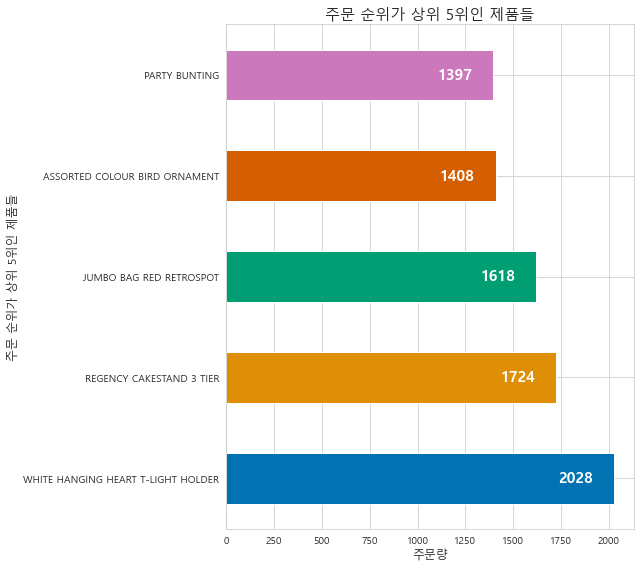

In [89]:
fig, ax=plt.subplots(1, 1, figsize=(9,8))
colors=sns.color_palette("colorblind", len(df_copy["description"].value_counts().head(5)))
_=df_copy["description"].value_counts().head(5).plot.barh(color=colors)
_=plt.title("주문 순위가 상위 5위인 제품들", fontsize=15)
_=plt.xlabel("주문량", fontsize=12)
_=plt.ylabel("주문 순위가 상위 5위인 제품들", fontsize=12)

yPosition=list(ax.get_yticks())
position=0
idx=0

for ii in df_copy["description"].value_counts().head(5).values:
    #print(ii)
    ax.text(s=ii, y=yPosition[idx], x=ii-200, ha="center", fontdict={"color":"white", "fontweight":"bold", "fontsize":15}, va="center")
    position+=1
    idx+=1

fig.tight_layout() # 그림 짤리지 않게 하는 방법이다.
fig.savefig("./../images_Commerce/주문 순위 상위 5등.png", facecolor="#E6E9EE", dpi=200)

In [90]:
spent_cus=df_copy[["customerid", "spent"]].groupby(["customerid"])["spent"].sum()
spent_cus.sort_values(ascending=False)

customerid
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
17956        12.75
16454         6.90
14792         6.20
16738         3.75
13256         0.00
Name: spent, Length: 4339, dtype: float64

In [91]:
spent_cus=spent_cus[spent_cus>0]
spent_cus

customerid
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: spent, Length: 4338, dtype: float64

[tip] argmax와 argmin을 이용하여 가장 큰 값의 인덱스와 가장 작은 값의 인덱스를 구해보자.

In [92]:
print(f"가장 적게 구매한 고객 아이디는 {spent_cus.argmin()}이고, 금액은 {spent_cus.min()}이다.")
print(f"가장 많이 구매한 고객 아이디는 {spent_cus.argmax()}이고, 금액은 {spent_cus.max()}이다.")

가장 적게 구매한 고객 아이디는 3217이고, 금액은 3.75이다.
가장 많이 구매한 고객 아이디는 1689이고, 금액은 280206.02이다.


In [93]:
unit_min=np.min(df_copy["unitprice"])
unit_max=np.max(df_copy["unitprice"])
unit_mean=np.mean(df_copy["unitprice"])
unit_med=np.median(df_copy["unitprice"])

In [94]:
print(f"개별 품목의 최소 가격은 {unit_min} 파운드이고, 최대 가격은 {unit_max} 파운드다.") # 최소, 최대
print(f"개별 품목의 평균은 {unit_mean} 파운드다.") # 평균
print(f"개별 품목의 중앙값은 {unit_med} 파운드다.") # 중앙값

개별 품목의 최소 가격은 0.0 파운드이고, 최대 가격은 8142.75 파운드다.
개별 품목의 평균은 3.1161744805540756 파운드다.
개별 품목의 중앙값은 1.95 파운드다.


[boxplot] 최대값, 최소값, 중앙값을 이용해서 자료의 측정 값들의 분포를 쉽게 볼 수 있다.

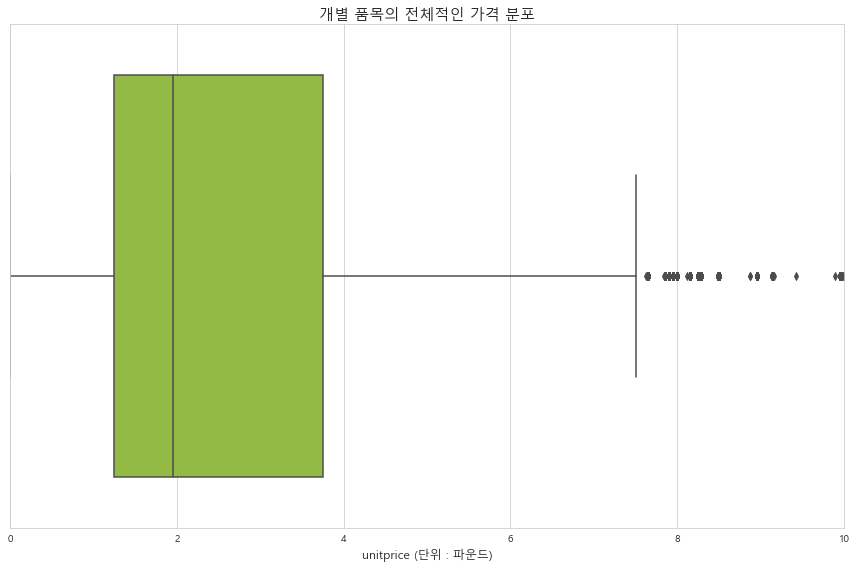

In [95]:
fig, ax=plt.subplots(1, 1, figsize=(12,8))
_=sns.boxplot(data=df_copy, x="unitprice", color="yellowgreen")
_=plt.xlim(0,10)
_=plt.xlabel("unitprice (단위 : 파운드)", fontsize=12)
_=plt.title("개별 품목의 전체적인 가격 분포", fontdict={"fontsize":15})
_=plt.tight_layout()
fig.savefig("./../images_Commerce/개별 품목 전체적인 가격 분포.png", facecolor="#E6E9EE", dpi=200)

[해석하는 방법] 0에서 7.xx 파운드까지 대부분의 상품 금액이 분포하는데, 초록색 상자 안 정도의 금액이 많이 분포되어 있음을 의미한다. 점으로 표기되어 있는 부분은 이상점이다.

In [96]:
under_seven=df_copy["unitprice"].loc[df_copy["unitprice"]<=7].count()
under_seven

362316

In [97]:
total_unit=df_copy["unitprice"].shape[0]
total_unit

397924

In [98]:
(under_seven/total_unit)*100

91.05155758386023

In [99]:
print(f"7 파운드 이하의 상품 주문이 전체 물건 건수의 {(under_seven/total_unit)*100:.2f}%를 차지한다.")

7 파운드 이하의 상품 주문이 전체 물건 건수의 91.05%를 차지한다.


In [100]:
under_five=df_copy["unitprice"].loc[df_copy["unitprice"]<=5].count()
under_five

346757

In [101]:
print(f"5 파운드 이하의 상품 주문이 전체 물건 건수의 {(under_five/total_unit)*100:.2f}%를 차지한다.")

5 파운드 이하의 상품 주문이 전체 물건 건수의 87.14%를 차지한다.


이 상점에서는 상대적으로 저렴한 물건을 팔아서 이익을 내는 구조를 가지고 있다. (7 파운드 이하의 상품과 5 파운드 이하 상품의 비율이 크게 차이가 나지 않기 때문이다.)

In [102]:
total_sum=df_copy["spent"].sum()
total_sum

8911407.904

In [103]:
sum_under_seven=df_copy["spent"].loc[df_copy["unitprice"]<=7].sum()
sum_under_seven

7599120.314000001

In [104]:
(sum_under_seven/total_sum)*100

85.27407112168032

In [105]:
print(f"7 파운드 이하의 상품은 전체 수익의 {(sum_under_seven/total_sum)*100:.2f}%를 차지한다.")

7 파운드 이하의 상품은 전체 수익의 85.27%를 차지한다.


In [106]:
sum_under_five=df_copy["spent"].loc[df_copy["unitprice"]<=5].sum()
sum_under_five

7100318.504000001

In [107]:
print(f"5 파운드 이하의 상품은 전체 수익의 {(sum_under_five/total_sum)*100:.2f}%를 차지한다.")

5 파운드 이하의 상품은 전체 수익의 79.68%를 차지한다.


## 4-2. 날짜에 따른 판매 금액 (시계열)

In [108]:
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


In [109]:
df1=df_copy[["invoicedate", "spent"]].groupby(["invoicedate"])["spent"].sum().reset_index()
df1

,invoicedate,spent
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86
...,...,...
17281,2011-12-09 12:23:00,124.60
17282,2011-12-09 12:25:00,140.64
17283,2011-12-09 12:31:00,329.05
17284,2011-12-09 12:49:00,339.20


* [setting] sns style로 스타일 지정해주기.

In [110]:
sns.set_style("whitegrid")
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 방지하기.
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지하기.

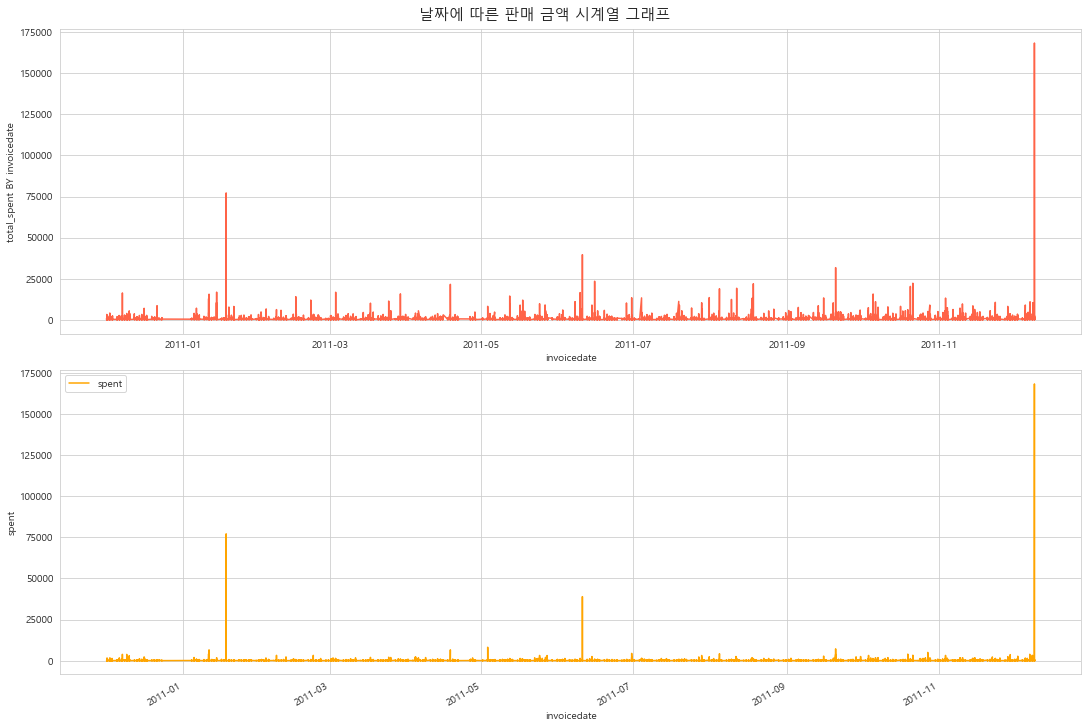

In [111]:
fig, ax=plt.subplots(2, 1, figsize=(15,10), constrained_layout=True)

_=sns.lineplot(data=df1, x="invoicedate", y="spent", ax=ax[0], color="tomato")
_=df_copy.plot(x="invoicedate", y="spent", color="orange", ax=ax[1])
_=ax[0].set_ylabel("total_spent BY invoicedate")
_=ax[1].set_ylabel("spent")
_=plt.suptitle("날짜에 따른 판매 금액 시계열 그래프", fontsize=15)
fig.savefig("./../images_Commerce/날짜에 따른 판매 금액 시계열 그래프1.png", facecolor="#E6E9EE", dpi=200)

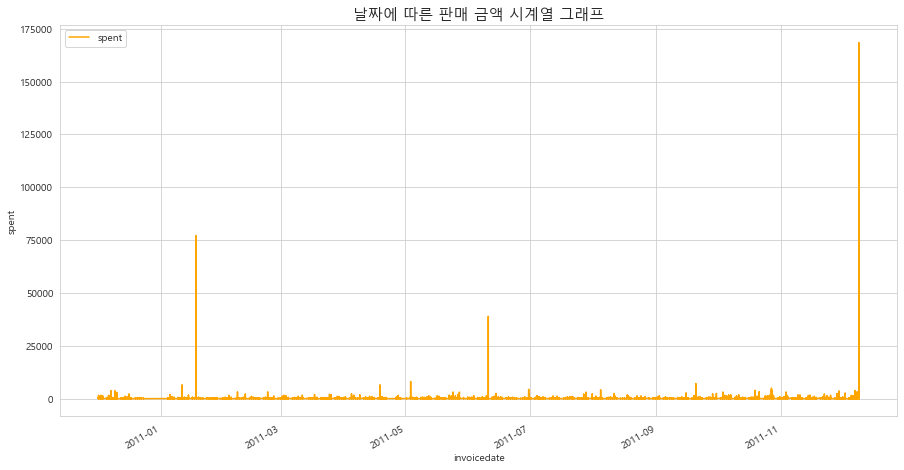

In [112]:
fig, ax=plt.subplots(1, 1, figsize=(15,8))

_=df_copy.plot(x="invoicedate", y="spent", ax=ax, color="orange")
_=plt.title("날짜에 따른 판매 금액 시계열 그래프", fontsize=15)
_=ax.set_ylabel("spent")
fig.savefig("./../images_Commerce/날짜에 따른 판매 금액 시계열 그래프2.png", facecolor="#E6E9EE", dpi=200)

곳곳에 판매 금액이 어마어마하게 높은 데이터들은 유심하게 지켜봐야 한다.

In [119]:
df_copy[["invoicedate", "spent"]].groupby(["invoicedate"])["spent"].sum().sort_values(ascending=False)

invoicedate
2011-12-09 09:15:00    168469.60
2011-01-18 10:01:00     77183.60
2011-06-10 15:28:00     39597.40
2011-09-20 11:05:00     31698.16
2011-06-15 13:37:00     23426.81
                         ...    
2011-10-11 11:02:00         0.38
2011-02-10 13:08:00         0.00
2011-11-25 15:57:00         0.00
2011-09-27 09:46:00         0.00
2011-08-26 14:19:00         0.00
Name: spent, Length: 17286, dtype: float64

2011-12-09 > 2011-01-18 > 2011-06-10 순으로 소비 금액이 많은 편이다.

## 4-3. 요일 별 / 시간 별 주문 량

In [120]:
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


주문 번호가 1개인 것이 필요하기 때문에, drop duplicates를 이용해서 주문 번호 1개 씩만 남겨 두고 처리하기.

In [125]:
df_copy.drop_duplicates(["invoiceno"]).head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,Wednesday,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,Wednesday,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,Wednesday,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,Wednesday,8


In [126]:
df_duplicate=df_copy.drop_duplicates(["invoiceno"], keep="first")
df_duplicate

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,Wednesday,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,Wednesday,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,Wednesday,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011,12,9,4,Friday,12
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011,12,9,4,Friday,12
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011,12,9,4,Friday,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011,12,9,4,Friday,12


In [127]:
df_duplicate[["weekday", "invoiceno"]].groupby(["weekday"]).size()

weekday
0    2863
1    3185
2    3455
3    4033
4    2831
6    2169
dtype: int64

In [128]:
df_duplicate[["weekday", "invoiceno"]].groupby(["weekday"])["invoiceno"].count() # 위와 아래는 동일한 결과를 가진다.

weekday
0    2863
1    3185
2    3455
3    4033
4    2831
6    2169
Name: invoiceno, dtype: int64

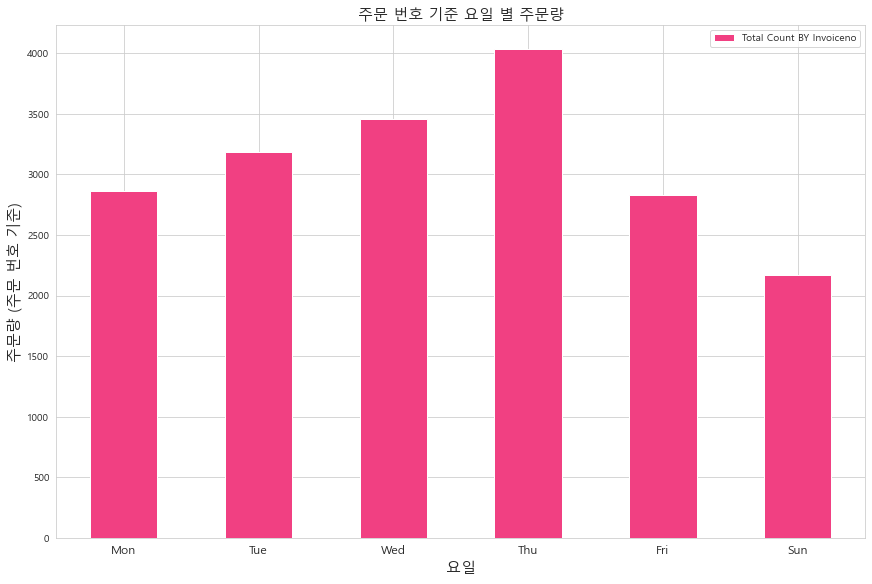

In [132]:
fig, ax=plt.subplots(1, 1, figsize=(12,8), constrained_layout=True)
_=df_duplicate[["weekday", "invoiceno"]].groupby(["weekday"]).size().plot(kind="bar", ax=ax, label="Total Count BY Invoiceno", color="#F14082")
_=ax.set_ylabel("주문량 (주문 번호 기준)", fontsize=15)
_=ax.set_xlabel("요일", fontsize=15)
_=ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sun"], fontsize=12, rotation=0)
_=ax.legend()
_=plt.title("주문 번호 기준 요일 별 주문량", fontsize=15)

fig.savefig("./../images_Commerce/주문 번호 기준 요일 별 주문량.png", facecolor="#E6E9EE", dpi=200)

주문량이 목요일이 가장 많고, 일요일이 가장 적다. 그리고 거의 2배 정도 차이가 난다. 목요일에 프로모션을 진행하거나 일요일에 주문량을 끌어올릴 수 있는 기획을 세우는 것이 좋을 것 같다.

In [133]:
df_duplicate.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,Wednesday,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,Wednesday,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,Wednesday,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,Wednesday,8


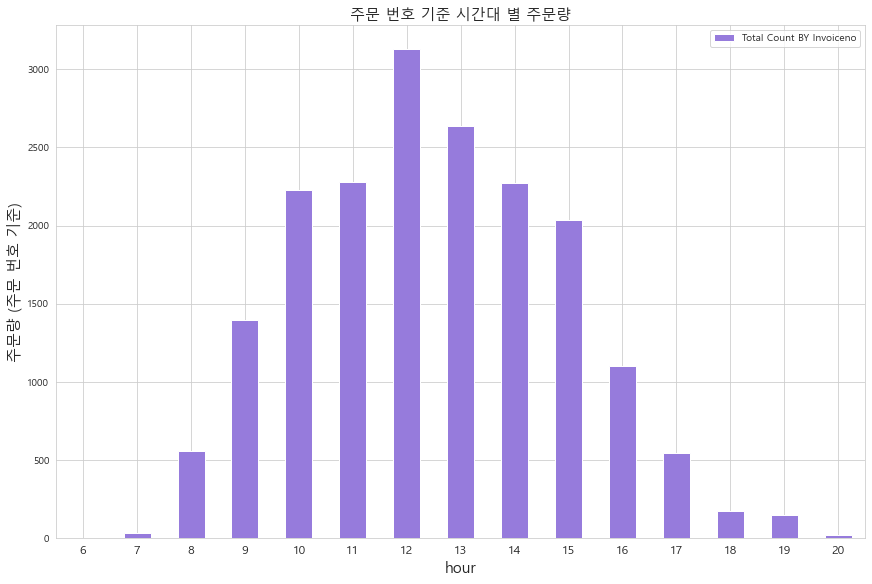

In [139]:
fig, ax=plt.subplots(1, 1, figsize=(12,8), constrained_layout=True)

_=df_duplicate[["hour", "invoiceno"]].groupby(["hour"])["invoiceno"].count().plot(kind="bar", ax=ax, color="#967BDC", label="Total Count BY Invoiceno")
_=ax.set_xlabel("hour", fontsize=15)
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
_=ax.set_ylabel("주문량 (주문 번호 기준)", fontsize=15)
_=ax.legend()
_=plt.title("주문 번호 기준 시간대 별 주문량", fontsize=15)

fig.savefig("./../images_Commerce/주문 번호 기준 시간대 별 주문량.png", facecolor="#E6E9EE", dpi=200)

새벽과 저녁 시간에는 적고, 낮 시간 대에 주문량이 많이 분포되어 있다. 12시에서 1시 쯤 주문량이 가장 많은 편에 속한다.

## 4-4. 국가 별 1회 주문의 평균 구매 금액

국가 별 주문 건수를 센 후에, (전체 금액 / 주문 건수) 로 해주면 1회 주문의 구매 금액이 나온다.

In [143]:
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


In [144]:
df2=df_copy[["invoiceno", "quantity", "country", "spent"]]
df2

,invoiceno,quantity,country,spent
0,536365,6,United Kingdom,15.30
1,536365,6,United Kingdom,20.34
2,536365,8,United Kingdom,22.00
3,536365,6,United Kingdom,20.34
4,536365,6,United Kingdom,20.34
...,...,...,...,...
541904,581587,12,France,10.20
541905,581587,6,France,12.60
541906,581587,4,France,16.60
541907,581587,4,France,16.60


In [145]:
df2=df2.groupby(["country", "invoiceno"]).sum()
df2["count"]=1 # 주문 건수를 만들기 위함이다.
df2

quantity    spent  count
country     invoiceno                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [146]:
df2=df2.groupby(["country"]).sum()
df2 # count가 전체 주문 건수가 된다. spent는 전체 주문 비용이 된다.

,quantity,spent,count
country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [147]:
df2["avg_spent"]=df2["spent"]/df2["count"]
df2

,quantity,spent,count,avg_spent
country,,,,
Australia,84209,138521.310,57,2430.198421
Austria,4881,10198.680,17,599.922353
Bahrain,260,548.400,2,274.200000
Belgium,23237,41196.340,98,420.370816
Brazil,356,1143.600,1,1143.600000
Canada,2763,3666.380,6,611.063333
Channel Islands,9491,20450.440,26,786.555385
Cyprus,6361,13590.380,16,849.398750
Czech Republic,671,826.740,2,413.370000


In [148]:
df2.sort_values(["count", "avg_spent"], ascending=False, inplace=True)
df2.head()

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


In [150]:
df2["avg_spent"].sort_values()

country
Saudi Arabia             145.920000
Bahrain                  274.200000
European Community       325.062500
Unspecified              333.383750
Poland                   386.034211
Czech Republic           413.370000
Lithuania                415.265000
Belgium                  420.370816
United Kingdom           438.968800
Italy                    460.085263
Germany                  500.803370
France                   537.336889
Malta                    545.118000
Finland                  549.904390
Portugal                 586.664737
Austria                  599.922353
Canada                   611.063333
Iceland                  615.714286
United Arab Emirates     634.093333
Spain                    684.190111
USA                      716.078000
Channel Islands          786.555385
Cyprus                   849.398750
Greece                   952.104000
RSA                     1002.310000
Norway                  1004.595556
EIRE                    1021.330385
Denmark             

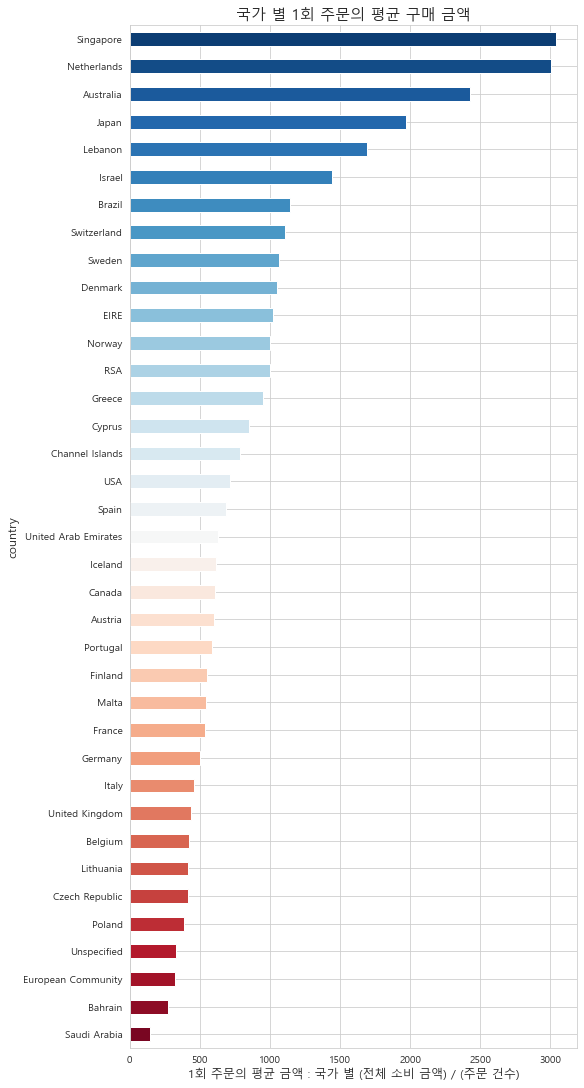

In [149]:
fig, ax=plt.subplots(1, 1, figsize=(8,15), constrained_layout=True)
colors=sns.color_palette("RdBu", len(df2["avg_spent"]))

_=df2["avg_spent"].sort_values().plot.barh(ax=ax, color=colors)
_=plt.title("국가 별 1회 주문의 평균 구매 금액", fontsize=15)
_=plt.ylabel("country", fontsize=12)
_=plt.xlabel("1회 주문의 평균 금액 : 국가 별 (전체 소비 금액) / (주문 건수)", fontsize=12)

fig.savefig("./../images_Commerce/국가 별 1회 주문의 평균 구매 금액.png", facecolor="#E6E9EE", dpi=200)

싱가포르가 가장 1회 주문 평균 금액이 가장 높고, 사우디 아라비아가 1회 주문 평균 금액이 가장 낮다. 거의 5 ~ 6배 정도 차이나는 것 같다.

* 영국은 주문 건수는 많으나, 1회 주문 금액은 그리 높지 않다.
* 하지만, 해외에서는 주문 건수는 영국에 비해 적으나, 1회 주문 금액은 높은 편에 속한다.

## 4-5. 상품 명에서 가장 빈번하게 등장하는 단어

In [151]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [152]:
str(df_copy.description)

"0          WHITE HANGING HEART T-LIGHT HOLDER\n1                         WHITE METAL LANTERN\n2              CREAM CUPID HEARTS COAT HANGER\n3         KNITTED UNION FLAG HOT WATER BOTTLE\n4              RED WOOLLY HOTTIE WHITE HEART.\n                         ...                 \n541904            PACK OF 20 SPACEBOY NAPKINS\n541905           CHILDREN'S APRON DOLLY GIRL \n541906          CHILDRENS CUTLERY DOLLY GIRL \n541907        CHILDRENS CUTLERY CIRCUS PARADE\n541908          BAKING SET 9 PIECE RETROSPOT \nName: description, Length: 397924, dtype: object"

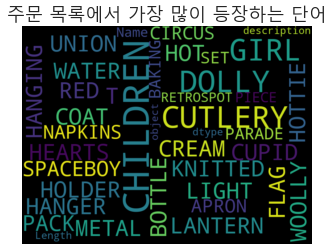

In [153]:
# Start with one review:
text = str(df_copy.description) # expected string or bytes-like object : TypeError > 문자열로 감싸주기.
stopwords=set(STOPWORDS) # 그 단어는 제외하고 그릴 예정이다.
stopwords.add("white")
stopwords.add("heart")

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, width=800, height=600, max_font_size=100, max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear') # bilinear가 가장 선명하게 잘 보인다.
plt.title("주문 목록에서 가장 많이 등장하는 단어", fontsize=18)
plt.axis("off") # 쓸데없는 축 제거하기.
plt.show()

_=wordcloud.to_file("./../images_Commerce/주문 목록에서 가장 많이 등장하는 단어.png")

하얀색과 하트 그리고 아이 관련 물품이 많이 판매된 것을 볼 수 있다. 소녀 관련 물품도 많은 편이고, 주방 용품 판매량도 꽤 높은 편에 속한다.

In [154]:
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


### [나의 질문]

* 소비 금액이 많이 나왔던 3개 날짜에 대해서 알아보기.
* 월 별 판매 금액 시계열 그래프와 주문 횟수 시계열 그래프 그리기.
* 소비 금액이 가장 높은 상위 3개 국가의 월 별, 요일 별, 시간 별 시계열 그래프 그리기.

## 4-6. 소비 금액이 많이 나왔던 3개 날짜에 대해서 알아보기.

In [282]:
df_copy.shape

(397924, 15)

In [283]:
df_first=df_copy.loc[(df_copy["month"]==12)&(df_copy["day"]==9)&(df_copy["year"]==2011), ["spent", "hour", "day_name", "quantity"]]
df_first

,spent,hour,day_name,quantity
540277,14.04,8,Friday,36
540278,15.00,8,Friday,12
540279,4.68,8,Friday,12
540280,9.90,8,Friday,6
540281,9.36,8,Friday,24
...,...,...,...,...
541904,10.20,12,Friday,12
541905,12.60,12,Friday,6
541906,16.60,12,Friday,4
541907,16.60,12,Friday,4


In [285]:
df_first=df_first.groupby(["day_name", "hour"])[["spent", "quantity"]].sum().reset_index()
df_first

,day_name,hour,spent,quantity
0,Friday,8,3581.93,2937
1,Friday,9,171679.08,82131
2,Friday,10,3092.10,2035
3,Friday,11,1863.69,1310
4,Friday,12,4132.48,2169


In [286]:
df_sec=df_copy.loc[(df_copy["month"]==1)&(df_copy["day"]==18)&(df_copy["year"]==2011), ["spent", "hour", "day_name", "quantity"]]
df_sec

,spent,hour,day_name,quantity
61548,79.20,8,Tuesday,144
61549,440.00,8,Tuesday,4
61550,67.50,8,Tuesday,10
61551,67.50,8,Tuesday,10
61552,67.50,8,Tuesday,10
...,...,...,...,...
62707,3.30,16,Tuesday,2
62708,2.95,16,Tuesday,1
62709,4.95,16,Tuesday,1
62710,0.95,16,Tuesday,1


In [287]:
df_sec=df_sec.groupby(["day_name", "hour"])[["spent", "quantity"]].sum().reset_index()
df_sec

,day_name,hour,spent,quantity
0,Tuesday,8,1062.55,261
1,Tuesday,9,2573.84,1494
2,Tuesday,10,78348.66,74856
3,Tuesday,11,1403.40,1548
4,Tuesday,12,726.69,394
5,Tuesday,13,1908.06,1277
6,Tuesday,14,681.05,294
7,Tuesday,15,395.83,266
8,Tuesday,16,489.03,228


In [288]:
df_thr=df_copy.loc[(df_copy["month"]==6)&(df_copy["day"]==10)&(df_copy["year"]==2011), ["spent", "hour", "day_name", "quantity"]]
df_thr

,spent,hour,day_name,quantity
221824,17.70,8,Friday,6
221825,17.70,8,Friday,6
221826,17.70,8,Friday,6
221827,10.08,8,Friday,24
221828,6.96,8,Friday,24
...,...,...,...,...
222709,24.96,16,Friday,12
222710,24.96,16,Friday,12
222711,49.92,16,Friday,24
222712,24.96,16,Friday,12


In [289]:
df_thr=df_thr.groupby(["day_name", "hour"])[["spent", "quantity"]].sum().reset_index()
df_thr

,day_name,hour,spent,quantity
0,Friday,8,795.13,499
1,Friday,9,1038.28,887
2,Friday,10,3506.48,1694
3,Friday,11,1913.60,1062
4,Friday,12,6948.39,3464
5,Friday,13,549.16,284
6,Friday,14,1496.96,795
7,Friday,15,41218.13,519
8,Friday,16,778.99,629


In [290]:
df_first["hour"].unique()

array([ 8,  9, 10, 11, 12], dtype=int64)

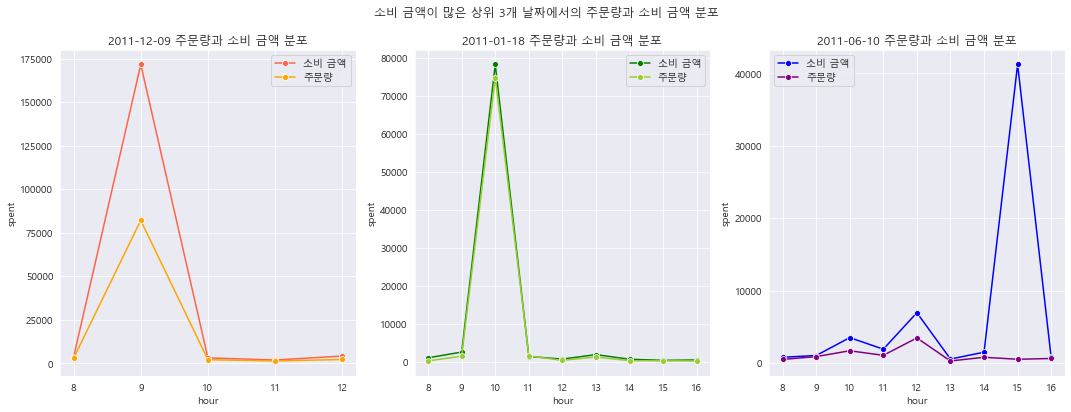

In [303]:
fig, ax=plt.subplots(1, 3, figsize=(18,6))
ax=ax.flatten()

_=sns.lineplot(data=df_first, x="hour", y="spent", ax=ax[0], marker="o", color="tomato", label="소비 금액")
_=sns.lineplot(data=df_first, x="hour", y="quantity", ax=ax[0], marker="o", color="orange", label="주문량")
_=ax[0].set_xticks(df_first["hour"].unique())

_=sns.lineplot(data=df_sec, x="hour", y="spent", ax=ax[1], marker="o", color="green", label="소비 금액")
_=sns.lineplot(data=df_sec, x="hour", y="quantity", ax=ax[1], marker="o", color="yellowgreen", label="주문량")
_=ax[1].set_xticks(df_sec["hour"].unique())

_=sns.lineplot(data=df_thr, x="hour", y="spent", ax=ax[2], marker="o", color="blue", label="소비 금액")
_=sns.lineplot(data=df_thr, x="hour", y="quantity", ax=ax[2], marker="o", color="purple", label="주문량")
_=ax[2].set_xticks(df_thr["hour"].unique())

_=ax[0].set_title("2011-12-09 주문량과 소비 금액 분포")
_=ax[1].set_title("2011-01-18 주문량과 소비 금액 분포")
_=ax[2].set_title("2011-06-10 주문량과 소비 금액 분포")
_=plt.suptitle("소비 금액이 많은 상위 3개 날짜에서의 주문량과 소비 금액 분포")

fig.savefig("./../images_Commerce/소비 금액이 많은 상위 3개 날짜에서의 주문량과 소비 금액 분포.png", facecolor="#E6E9EE", dpi=200)

2011-12-09 에는 오전 9시에 주문량과 소비 금액이 가장 많다. 소비 금액과 주문량이 차이가 나는 것으로 보아, 많은 소비 금액을 지불한 고객이 있어 보인다. 2011-01-18 에는 오전 10시에 주문량과 소비 금액이 가장 많다. 비슷한 것으로 보아, 다들 소비 금액이 적게 구매한 것 같다. 2011-06-10 에는 오후 3시에 가장 소비 금액이 많았고, 주문량이 적은 것으로 보아, 비싼 물건을 구매한 고객이 있음을 알 수 있다. 이 날짜가 어떤 날인지에 대한 데이터가 있었으면 더 깊게 분석할 수 있었을 것이다.

## 4-7. 월 별 판매 금액 시계열 그래프와 주문 횟수 시계열 그래프 그리기.

In [160]:
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


In [161]:
df3=df_copy[["invoiceno", "month"]]
df3.loc[:, "count"]=1
df3

C:\Users\ajouu\AppData\Local\Temp\ipykernel_352\2718134124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, "count"]=1


,invoiceno,month,count
0,536365,12,1
1,536365,12,1
2,536365,12,1
3,536365,12,1
4,536365,12,1
...,...,...,...
541904,581587,12,1
541905,581587,12,1
541906,581587,12,1
541907,581587,12,1


In [162]:
df_sum=df_copy[["month", "spent"]].groupby("month")["spent"].sum()
df_sum

month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: spent, dtype: float64

In [163]:
df4=df3.groupby(["month"])["count"].sum()
df4

month
1     21232
2     19928
3     27177
4     22644
5     28322
6     27185
7     26827
8     27013
9     40030
10    49557
11    64545
12    43464
Name: count, dtype: int64

In [164]:
df_min=df_copy.loc[df_copy["spent"]>0]
df_min

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12,9,4,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,9,4,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,9,4,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,9,4,Friday,12


In [165]:
df_max=df_copy[["month", "spent"]].groupby("month").max().reset_index()
df_min=df_min[["month", "spent"]].groupby("month").min().reset_index()

In [166]:
df_max

,month,spent
0,1,77183.60
1,2,3215.52
2,3,2076.80
3,4,6539.40
4,5,8142.75
5,6,38970.00
6,7,3129.60
7,8,4176.00
8,9,7144.72
9,10,4992.00


In [167]:
df_min

,month,spent
0,1,0.190
1,2,0.180
2,3,0.190
3,4,0.001
4,5,0.190
5,6,0.100
6,7,0.001
7,8,0.120
8,9,0.001
9,10,0.120


In [168]:
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 방지하기.
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지하기.

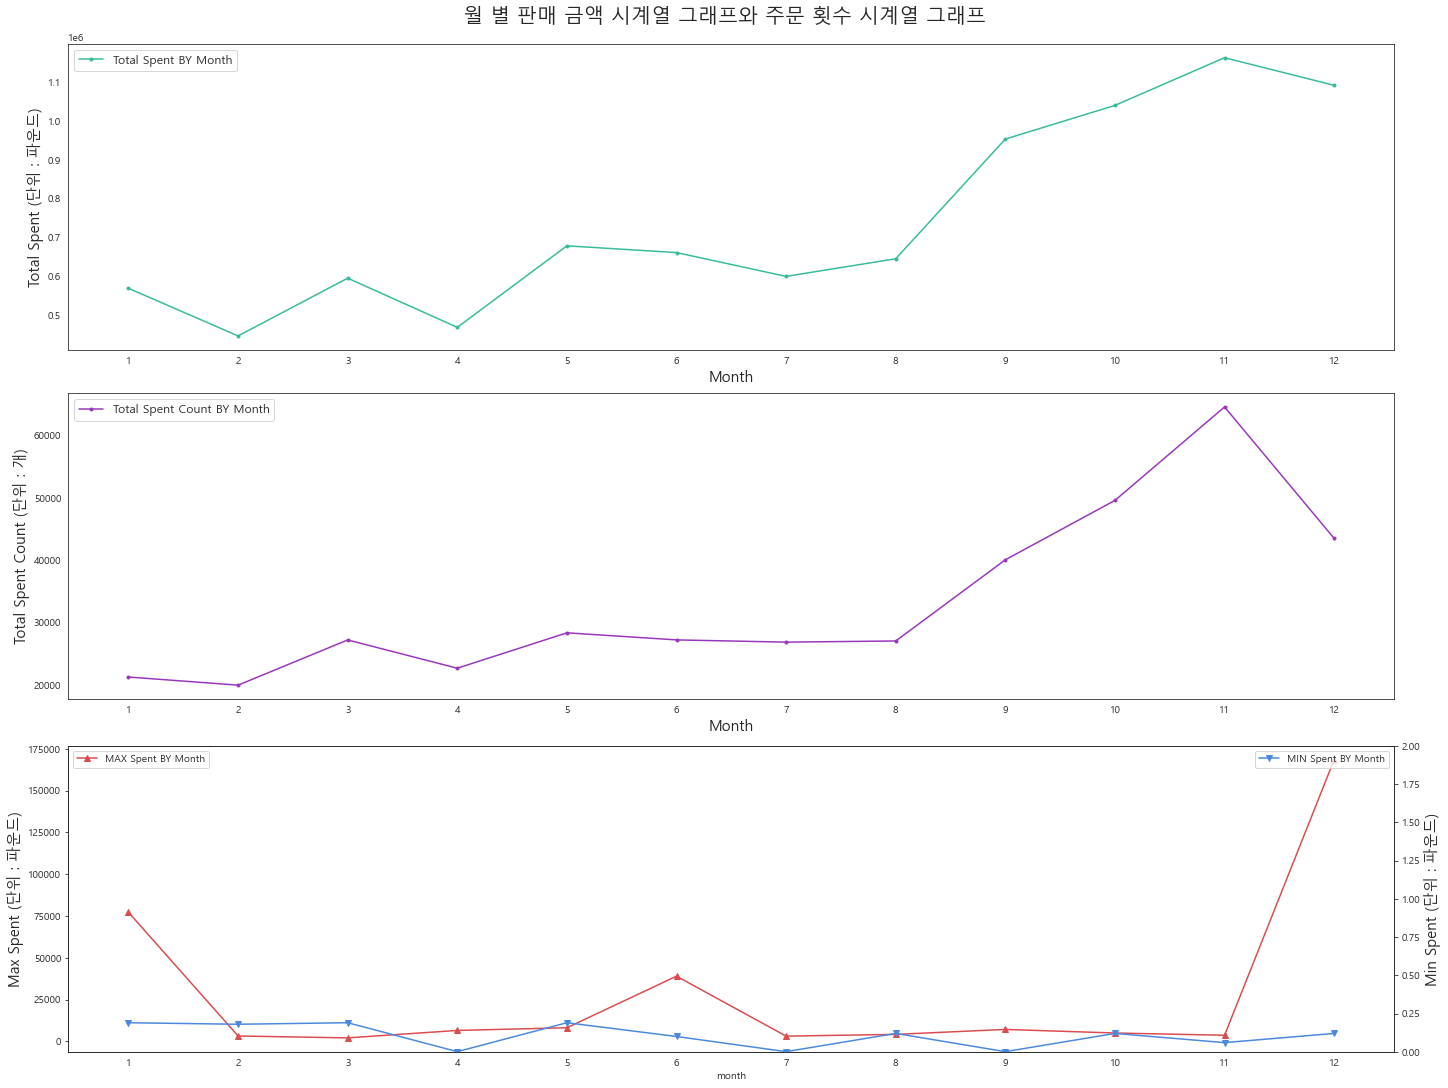

In [169]:
fig, ax=plt.subplots(3, 1, figsize=(20,15), constrained_layout=True)

_=df_sum.plot(x=df_sum.index, ax=ax[0], color="#36BC9B", label="Total Spent BY Month", marker=".")
_=ax[0].set_xticks(df_copy["month"].unique()) # 1 ~ 12월까지 표기하기.
_=ax[0].legend(fontsize=12)
_=ax[0].set_xlabel("Month", fontsize=15)
_=ax[0].set_ylabel("Total Spent (단위 : 파운드)", fontsize=15)

_=df4.plot(x=df4.index, ax=ax[1], marker=".", color="#9A36BC", label="Total Spent Count BY Month")
_=ax[1].set_xticks(df4.index)
_=ax[1].set_xlabel("Month", fontsize=15)
_=ax[1].set_ylabel("Total Spent Count (단위 : 개)", fontsize=15)
_=ax[1].legend(fontsize=12)

twin_ax=ax[2].twinx()
_=twin_ax.set_ylim(0, 2)
_=df_max.plot(x="month", y="spent", ax=ax[2], color="#DC4B4E", marker="^", label="MAX Spent BY Month")
_=df_min.plot(x="month", y="spent", ax=twin_ax, color="#4B89DC", marker="v", label="MIN Spent BY Month")
_=ax[2].set_xticks(df_max["month"].unique())
_=ax[2].set_ylabel("Max Spent (단위 : 파운드)", fontsize=15)
_=twin_ax.set_ylabel("Min Spent (단위 : 파운드)", fontsize=15)

_=plt.suptitle("월 별 판매 금액 시계열 그래프와 주문 횟수 시계열 그래프", fontsize=20)
fig.savefig("./../images_Commerce/월 별 판매 금액 시계열 그래프와 주문 횟수 시계열 그래프.png", facecolor="#E6E9EE", dpi=200)

* 1월, 6월, 12월에 판매 금액이 굉장히 높다.
* 2월에 구매 횟수가 가장 적고, 11월에 구매 횟수가 굉장히 많다.
* 월 별로 구매한 횟수의 합과 판매 금액의 합계는 월 별로 비슷한 경향성을 가지고 흘러가고 있다.
* 12월에 한번에 많이 산 금액이 약 175000 파운드 가까이 된다. 한번에 많이 산 고객과 적게 산 고객의 차이가 엄청나게 큰 편이다.
* 대체로 가장 적게 산 금액과 가장 많이 산 금액의 차이는 없는 편에 속한다. (1월, 6월, 12월에 차이가 크다.)

## 4-8. 소비 금액이 가장 높은 상위 3개 국가의 월 별, 요일 별, 시간 별 시계열 그래프 그리기.

In [170]:
df_copy[["country", "spent"]].groupby("country").sum().sort_values(by="spent", ascending=False).head(3).index
# 상위 3개의 국가를 가져왔다.

Index(['United Kingdom', 'Netherlands', 'EIRE'], dtype='object', name='country')

In [171]:
df_UK=df_copy.loc[df_copy["country"]=='United Kingdom']
df_UK.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


In [172]:
df_Net=df_copy.loc[df_copy["country"]=='Netherlands']
df_Net.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791,Netherlands,177.60,2010,12,1,2,Wednesday,11
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,15.00,2010,12,1,2,Wednesday,11
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48,2010,12,20,0,Monday,10
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48,2010,12,20,0,Monday,10
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90,2010,12,20,0,Monday,10


In [173]:
df_Eire=df_copy.loc[df_copy["country"]=='EIRE']
df_Eire.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911,EIRE,39.8,2010,12,1,2,Wednesday,14
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911,EIRE,17.7,2010,12,1,2,Wednesday,14
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911,EIRE,15.3,2010,12,1,2,Wednesday,14
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911,EIRE,42.5,2010,12,1,2,Wednesday,14
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911,EIRE,13.5,2010,12,1,2,Wednesday,14


In [174]:
df_all=df_copy.loc[(df_copy["country"]=='United Kingdom')|(df_copy["country"]=='Netherlands')|(df_copy["country"]=='EIRE')]
df_all.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


In [175]:
sns.set_style("darkgrid")
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 방지하기.
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지하기.

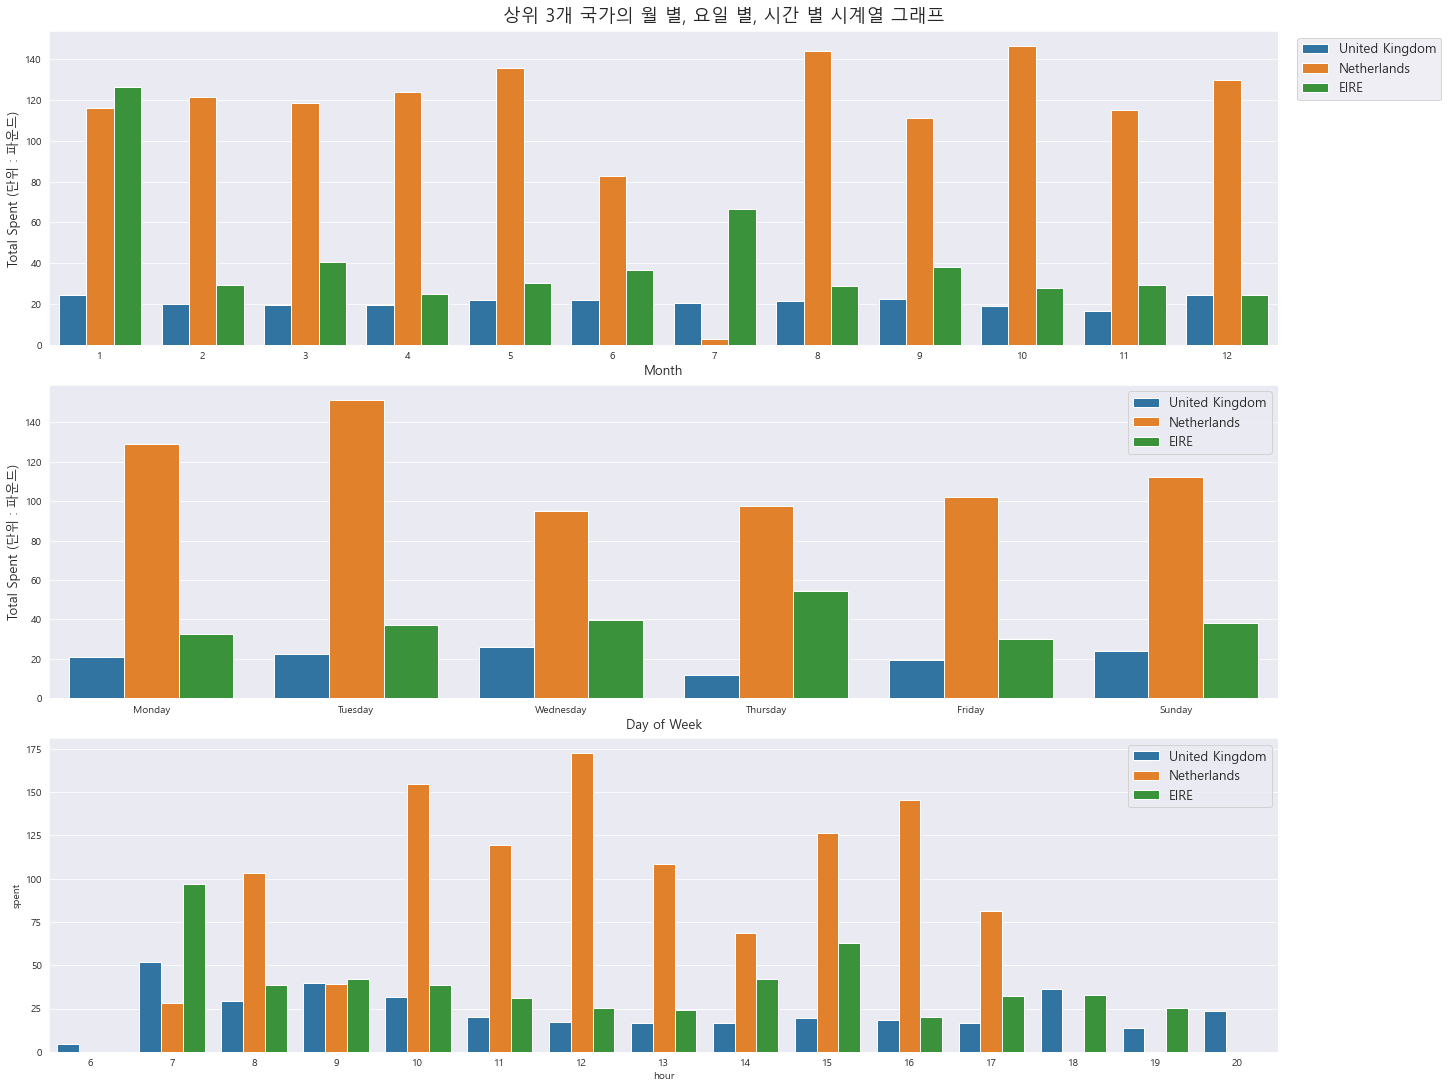

In [176]:
fig, ax=plt.subplots(3, 1, figsize=(20,15), constrained_layout=True)
_=plt.suptitle("상위 3개 국가의 월 별, 요일 별, 시간 별 시계열 그래프", fontsize=18)

_=sns.barplot(data=df_all, hue="country", x="month", y="spent", ax=ax[0], ci=None)
_=ax[0].legend(fontsize=13, bbox_to_anchor=(1.01, 1))
_=ax[0].set_ylabel("Total Spent (단위 : 파운드)", fontsize=13)
_=ax[0].set_xlabel("Month", fontsize=13)

_=sns.barplot(data=df_all, hue="country", x="day_name", y="spent", ax=ax[1], ci=None)
_=ax[1].legend(fontsize=13)
_=ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'])
_=ax[1].set_ylabel("Total Spent (단위 : 파운드)", fontsize=13)
_=ax[1].set_xlabel("Day of Week", fontsize=13)

_=sns.barplot(data=df_all, hue="country", x="hour", y="spent", ax=ax[2], ci=None)
_=ax[2].legend(fontsize=13, loc="upper right")